In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
page = str(1)
url = "http://formds.com/locales/washington-dc?page=%s"%page

In [3]:
def name_type_parse(df):
    type_par_list = []
    loc_list = []
    type_list = []
    for item in df['Company']:
        try:
            type_par = re.findall(r"\([^()]*\)",str(item))
            type_par_str = type_par[0]


            loc_f = re.findall(r"\-(.*)",type_par_str)
            loc_str = loc_f[0]


            type_f = re.findall(r"(.*)\-",type_par_str)
            type_str = type_f[0]

            type_list.append(type_str)
            loc_list.append(loc_str)
        except:
            type_list.append("Not Found")
            loc_list.append("Not Found")
        
    df['loc'] = loc_list
    df['type'] = type_list
    return(df)
    

In [36]:
def inc_cash_clean(df):
    inc_cash_list = []
    for item in df['Incremental Cash ']:
        if '$' not in item: item = '$-10'
        item = item.replace("$", "")
        item = item.replace(",", "")
        inc_cash_list.append(float(item))
    df['Incremental Cash float'] = inc_cash_list
    
    return(df)

In [5]:
def rep_cash_clean(df):
    rep_cash_list = []
    for item in df['Reported funding']:
        item = item.replace("$", "")
        item = item.replace(",", "")
        try:
            if float(item) < 100000000:
                rep_cash_list.append(float(item))
            else:
                rep_cash_list.append(30000001)
        except:
            rep_cash_list.append(0)
    df['Reported funding float'] = rep_cash_list
    
    return(df)

In [6]:
def append_new_page(old_df,next_page):
    #old_df = old_df_as_list[0]
    url = "http://formds.com/locales/washington-dc?page=%s"%str(next_page)
    
    new_df_as_list = pd.read_html(url,header =None)
    new_df = new_df_as_list[0]
    
    out_df = old_df.append(new_df,ignore_index=True)
    
    return(out_df)

In [7]:
def date_to_year(df):
    year_list = []
    for item in df['Date']:
        year_month = re.match(r"(.*)\-",item)
        year = re.match(r"(.*)\-",year_month.group(1))
        year_str = year.group(1)
        year_list.append(year_str)
    df['Year'] = year_list
    return(df)

In [8]:
def df_column_clean(df):
    
    df_1 = inc_cash_clean(df)
    df_2 = rep_cash_clean(df_1)
    df_3 = name_type_parse(df_2)
    df_4 = date_to_year(df_3)
    
    
    df_final = df_4
    return(df_final)

In [30]:
data = pd.read_html(url,header =None)
old_df = data[0]

for i in range(2,202):

    if i%10 == 0:
        print('Pulling page %s'%str(i))
                             
    new_df = append_new_page(old_df,i)
    old_df = new_df

              
full_df = old_df
    
dt = full_df
#dt = dt.drop(0)

Pulling page 10
Pulling page 20
Pulling page 30
Pulling page 40
Pulling page 50
Pulling page 60
Pulling page 70
Pulling page 80
Pulling page 90
Pulling page 100
Pulling page 110
Pulling page 120
Pulling page 130
Pulling page 140
Pulling page 150
Pulling page 160
Pulling page 170
Pulling page 180
Pulling page 190
Pulling page 200


In [169]:
dt.to_csv('form-d-200pg-pull.csv')

In [33]:

dtt =dt.copy()
dtt.keys()
len(dtt)


6030

In [15]:
dtt.head()

,Company,New Filing?,Reported funding,Incremental Cash,Date,New or Amended
0,"FDS Nolensville Holdings, LLC (Commercial - A...",Yes,"$3,772,426","$3,772,426",2019-02-13,New Filing
1,PH Group Parent Corp. (Business Services - Ar...,Yes,"$18,729,702","$18,729,702",2019-02-13,New Filing
2,"Monsoon India Dynamic Alpha Fund, L.P. (Poole...",No,"$20,391,555","$4,816,355",2019-02-12,Amended
3,"Remine Inc. (Other Technology - Fairfax, VA)",Yes,"$29,683,058","$29,683,058",2019-02-12,New Filing
4,Nisos Holdings Inc. (Other Technology - Alexa...,Yes,"$6,100,000","$6,100,000",2019-02-12,New Filing


In [34]:
dt.describe()

,Company,New Filing?,Reported funding,Incremental Cash,Date,New or Amended
count,6030,6030,6030,6030,6030,6030
unique,3062,2,3266,2792,2070,2
top,"Verte Capital, LLC (Pooled Investment Fund - ...",Yes,Yet to Sell,$0,2012-03-15,New Filing
freq,27,4047,686,1322,33,4047


In [37]:
dfc = df_column_clean(dtt)


In [38]:
dfc.describe()

,Incremental Cash float,Reported funding float
count,6.030000e+03,6.030000e+03
mean,4.202814e+07,1.278839e+07
std,2.980532e+08,1.924291e+07
min,-1.000000e+01,0.000000e+00
25%,0.000000e+00,2.100000e+05
50%,7.491250e+05,2.330000e+06
75%,6.359242e+06,2.748232e+07
max,1.313696e+10,9.999600e+07


In [22]:
dfc.keys()

Index(['Company', 'New Filing?', 'Reported funding', 'Incremental Cash ',
       'Date', 'New or Amended', 'Incremental Cash float',
       'Reported funding float', 'loc', 'type', 'Year'],
      dtype='object')

In [101]:
a = dfc['type'].value_counts()

x = []
y = []

for item in a.keys():
    #x.append(int(item))
    x.append(item)
for other_item in x:
    y.append(a[str(other_item)])
    

In [74]:
dates = []
for i in range(len(dfc)):
    dates.append(dfc['Date'][i])
dfc['date_str'] = dates

In [ ]:
dfc['Date'].hist()

In [ ]:
%matplotlib inline
dttt.plot(kind="bar",x="Date", y="Reported funding float",figsize=(20,13))

In [171]:
dfc['Year'].value_counts()

2018    787
2015    733
2014    725
2016    709
2017    697
2013    580
2011    500
2012    469
2010    454
2009    273
2019    103
Name: Year, dtype: int64

<BarContainer object of 10 artists>

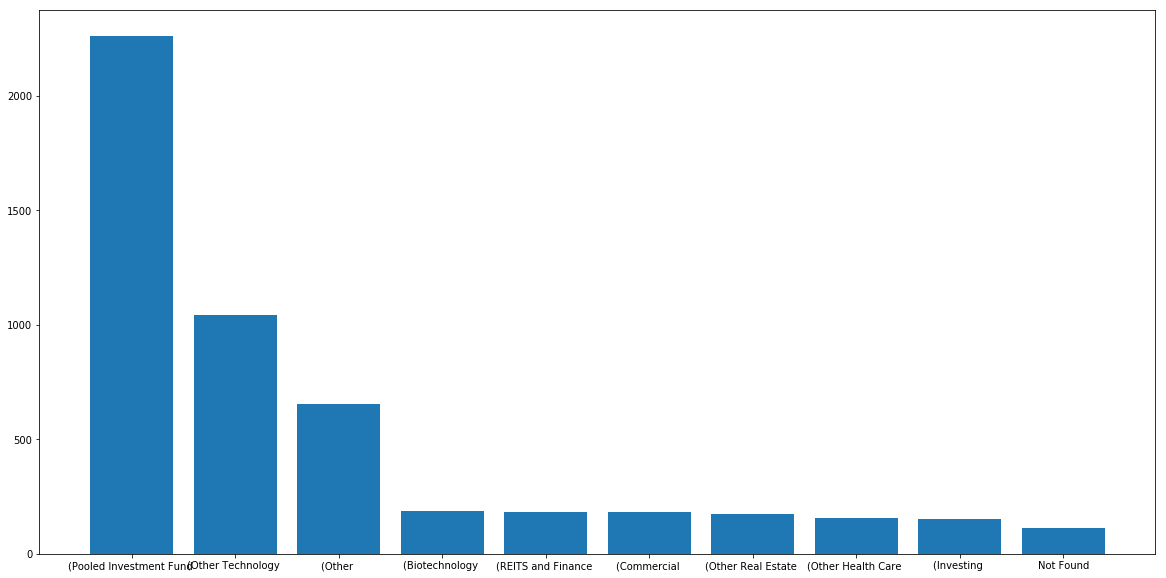

In [109]:
xx = []
yy = []

for i in range(10):
    xx.append(x[i])
    yy.append(y[i])
plt.figure(figsize=(20,10))
plt.bar(x=xx,height=yy)


In [155]:
dfc_2 = dfc.copy()
dfc_2 = dfc_2.groupby(["type", "Year"]).size()
dfc_2

type                           Year
(Agriculture                   2009     1
                               2010     1
                               2011     1
                               2015     4
                               2016     2
                               2017     1
                               2018     1
(Biotechnology                 2009     7
                               2010    12
                               2011    19
                               2012    18
                               2013    20
                               2014    21
                               2015    24
                               2016    22
                               2017    19
                               2018    21
                               2019     2
(Business Services             2009     9
                               2010    16
                               2011    11
                               2012    10
                               2013    1

In [167]:
x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

y_pooled = dfc_2['(Pooled Investment Fund ']
y_pool_der = y_pooled.diff()
y_pool_inf = y_pool_der.diff()

y_other_tech = dfc_2['(Other Technology '] + dfc_2['(Biotechnology '] +  dfc_2['(Other ']
y_other_der = y_other_tech.diff()
y_other_inf = y_other_der.diff()
    

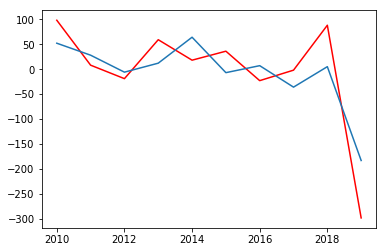

In [165]:
plt.plot(x,y_pool_der,'r')
plt.plot(x,y_other_der)




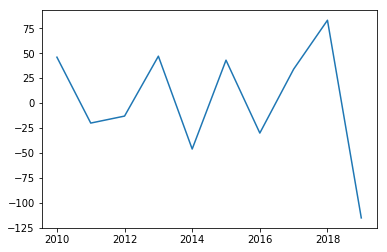

In [166]:
plt.plot(x,y_pool_der-y_other_der)

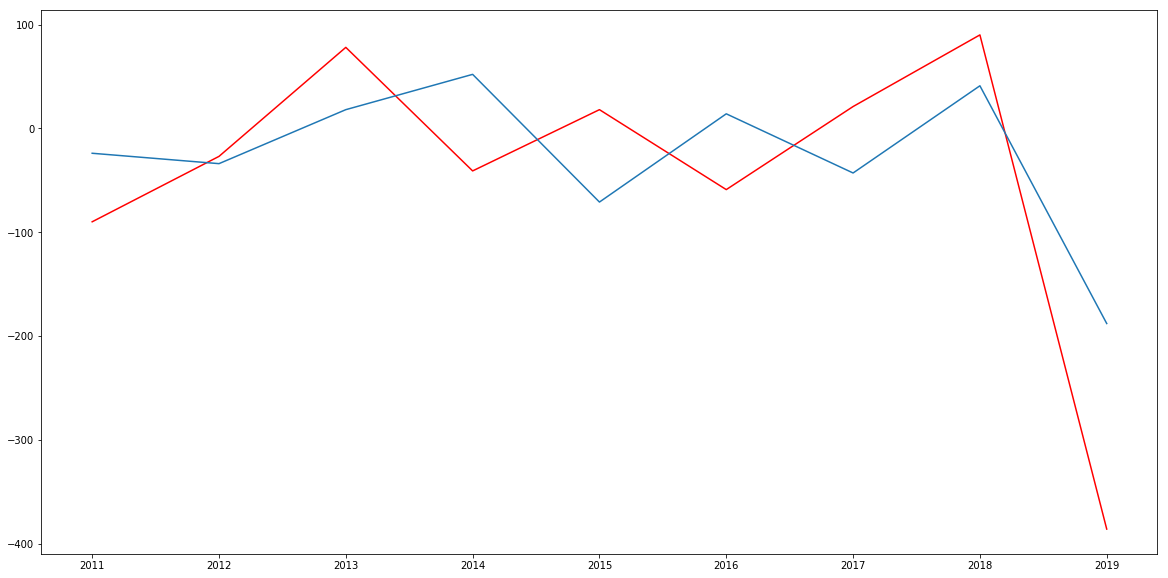

In [170]:
plt.figure(figsize=(20,10))
plt.plot(x,y_pool_inf,'r')
plt.plot(x,y_other_inf)
